#The code is for creating the feature vector before inputting it into the Log-reg / LSTM/ forest tree stuff

In [ ]:
!pip install findspark
!pip install pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 55.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=07df7982b0dfb2fac0109f3e86b66b33728c72807fae2d7b8cfa147da092eb50
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [28]:
import findspark
import pyspark
import pandas as pd

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
from textblob import TextBlob

In [29]:
from google.colab import drive
drive.flush_and_unmount()

In [30]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os

cwd = os.getcwd()  

In [ ]:
files = os.listdir(cwd+"/gdrive/MyDrive/CS4225/datasets/reddit") 
files 

['comments1.csv',
 'submissions1.csv',
 'comments2.csv',
 'submissions2.csv',
 'cleaned_comments.csv',
 'cleaned_submissions.csv',
 'cleaned_submissions2.csv',
 'cleaned_comments2.csv']

## Feature vector

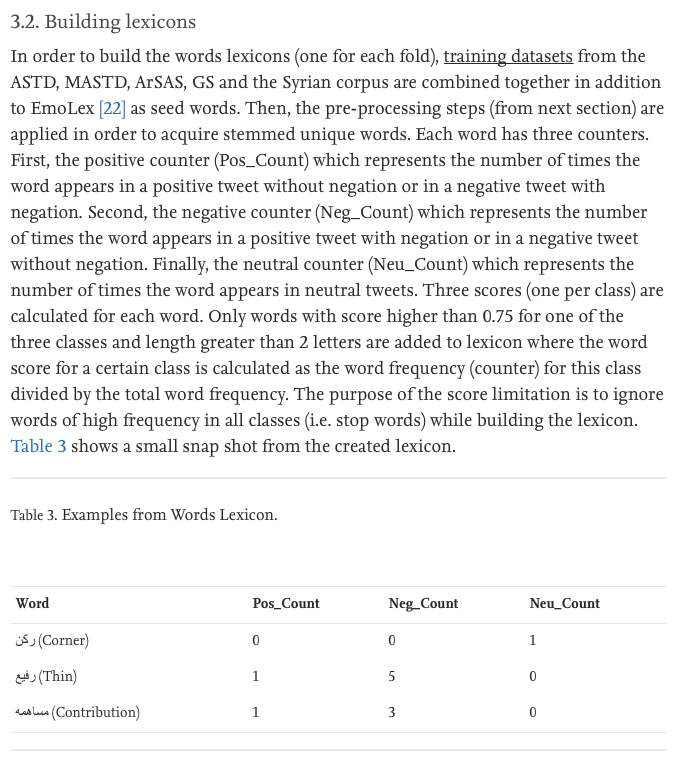

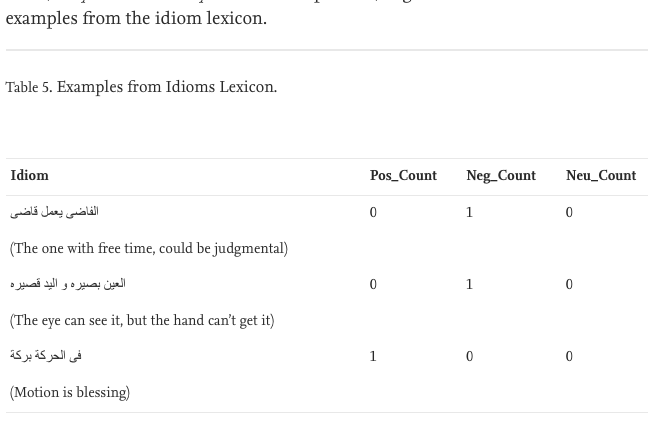

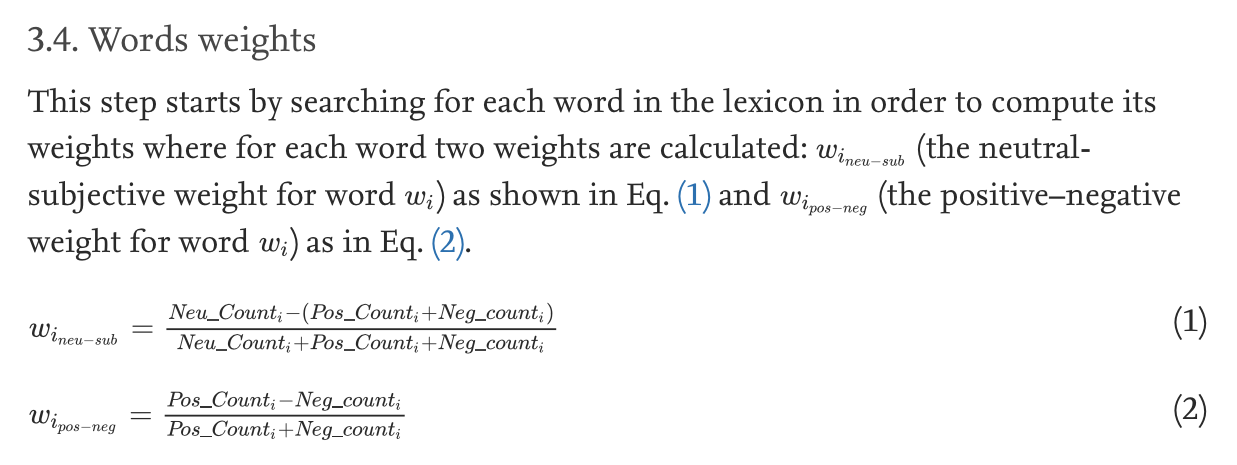

In [ ]:
"""#not too sure what lables will be generated when u use lexicon, but ill use the following shown in the pics
# im just gonna loop it for now, just as an example.
# if theres any mistakes or any way to speed it up, pls help to ammend it thnkss

def Wi_neusub(row):
  neu = row['Neu_Count']
  neg = row['Neg_Count']
  post = row['Pos_Count']
  total = (neu - (pos + neg)) / (neu+ pos + neg)
  return total.item()

def Wi_pos_neg(row):
  neu = row['Neu_Count']
  neg = row['Neg_Count']
  post = row['Pos_Count']
  total = (pos - neg) / (pos + neg)
  return total.item()

for i in range(len(feature_sentence)):

  #summation for the weights
  wi_sum_ns = 0
  wi_sum_pn = 0
  wi_sum_pos = 0
  wi_sum_neg = 0
  wi_sum_neu = 0
  pos = 0
  neg = 0
  neu = 0
  sub = 0
  p1=0
  p2=0
  p3=0


  
  #selection for sentence
  sentence = feature_sentence.iloc[i,:]['Sentence']
  res = sentence.split() 
  total_words = len(res)

  for word in res:

    #chosen row to deal with
    chosen_row = feature_words.loc[feature_words['Word'] == word]

    #calling functions for weights
    wi_sum_ns += Wi_neusub(chosen_row) #1
    wi_sum_pn += Wi_pos_neg(chosen_row) #2
    wi_sum_pos += chosen_row['Pos_Count'].item() #4
    wi_sum_neg += chosen_row['Neg_Count'].item() #5
    wi_sum_neu += chosen_row['Neu_Count'].item() #3
    if (chosen_row['Sentiment'].item() == 'positive'):
      pos+=1
    elif (chosen_row['Sentiment'].item() == 'neg'):
      neg+=1
    else:
      neu+=1

  #6 idk whats the api max count/ sum characters
  count = res.count('')-1 # need do the percentage thing
  p1 = pos/count
  p2 = neg/count
  p3 = neu/count
  print(p1, p2, p3)
  liss = [wi_sum_ns,wi_sum_pn,wi_sum_neu,wi_sum_pos,wi_sum_neg,count, p1, p2, p3,0]
  feature_vector.loc[len(feature_vector)] = liss

"""

-0.0 -0.0 -1.0
-0.0 -0.0 -2.0
-2.0 -0.0 -1.0


Afterwhich, i can input this feature vector to test for logistic regression etc... within spark

# Combining data

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pickle

In [ ]:
 files = os.listdir("/content/gdrive/MyDrive/CS4225/ML team/Sentiment Analysis Results/lexicon/twitter/scrap_nov_dec/") 

###vectors

In [ ]:
import os
import glob

os.chdir("/content/gdrive/MyDrive/CS4225/ML team/Sentiment Analysis Results/lexicon/twitter/scrap_nov_dec/vectors")


extension = 'csv'
all_vectors = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_vectors = pd.concat([pd.read_csv(f) for f in all_vectors])

#export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

###sentiments

In [34]:

os.chdir("/content/gdrive/MyDrive/CS4225/ML team/Sentiment Analysis Results/lexicon/twitter/scrap_nov_dec/sentiments")

extension = 'csv'
all_sentiment = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_sentiments = pd.concat([pd.read_csv(f) for f in all_sentiment])

##labels

In [35]:
import os
import glob
import pandas as pd
os.chdir("/content/gdrive/MyDrive/CS4225/ML team/Sentiment Analysis Results/lexicon/twitter/scrap_nov_dec/labels")


extension = 'csv'
all_lables = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_lables = pd.concat([pd.read_csv(f) for f in all_lables])

#export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

##combining lables and vectors

In [ ]:
combined_total = combined_vectors.merge(combined_lables, on='Unnamed: 0', how='left')

In [ ]:
combined_total = combined_total.drop(['Unnamed: 0','Created_at','Sentence','Lang'], axis=1)

# New Section

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
#ae1 = spark.read.csv('ae.csv', header = True, inferSchema = True)
#ae2 = spark.read.csv('ae-2.csv', header = True, inferSchema = True)
spark_combined = spark.createDataFrame(combined_total)   #3mins 23s
spark_combined.printSchema()

In [ ]:
numeric_features = [t[0] for t in spark_combined.dtypes if t[1] != 'string']

In [ ]:
numeric_features.pop(-1)
spark_combined.select(numeric_features).describe().toPandas().transpose() # DONT need to run this,onyl for visualisation

In [ ]:
from pyspark.ml.feature import OneHotEncoder

from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

In [ ]:

#categoricalColumns = ['Lang']
stages = []
#for categoricalCol in categoricalColumns:
#    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
#    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
#    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'Label', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['Total_neu_sub',
 'Total_pos_neg',
 'Total_pos',
 'Total_neg',
 'Total_neu',
 'Len_sentence',
 'Perc_pos',
 'Perc_neg',
 'Perc_neu',
 'Pos_count',
 'Neg_count',
 'Neu_count']
assemblerInputs = numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(spark_combined)
spark_combined = pipelineModel.transform(spark_combined)
selectedCols = ['features', 'label']
spark_combined = spark_combined.select(selectedCols)
spark_combined.printSchema()

In [ ]:

train, val_set, test = spark_combined.randomSplit([0.8, 0.1, 0.1], seed = 2000)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

In [ ]:
from pyspark.ml.classification import LogisticRegression

from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel, LogisticRegressionWithSGD
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vectors
from pyspark import SparkContext
sc = SparkContext.getOrCreate();

#lrm = LogisticRegressionWithSGD.train(sc.parallelize(train), iterations=10)

In [ ]:
lr = LogisticRegression(featuresCol = 'features', labelCol='label', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(train)


In [ ]:
# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

In [ ]:
lr_predictions = lr_model.transform(test)
lr_predictions.select("prediction","label","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="label",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

In [ ]:
predictions = lrModel.transform(test)
predictions.select("prediction","label","features").show()

In [ ]:
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(val_set.count())
accuracy

In [ ]:
trainingSummary = lrModel.summary

In [ ]:
# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

In [ ]:
# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

In [31]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load training data
data = spark.read.format("libsvm") \
    .load("data/mllib/sample_libsvm_data.txt")

# Split the data into train and test
splits = data.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train)

# select example rows to display.
predictions = model.transform(test)
predictions.show()

# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-62e46a0d82dd>", line 5, in <module>
    data = spark.read.format("libsvm")     .load("data/mllib/sample_libsvm_data.txt")
  File "/usr/local/lib/python3.7/dist-packages/pyspark/sql/readwriter.py", line 158, in load
    return self._df(self._jreader.load(path))
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1322, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/lib/python3.7/dist-packages/pyspark/sql/utils.py", line 117, in deco
    raise converted from None
pyspark.sql.utils.AnalysisException: Path does not exist: file:/content/gdrive/.shortcut-targets-by-id/14RAnUUdK7k4oJBX-l5xhRqKZK-fZGW4y/CS4225/ML team/lexicon/processed data/twitter/scrap_nov_dec/labels/data/mllib/sample_libsvm_data.txt

During ha

AnalysisException: ignored